In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
fake = pd.read_csv("/content/drive/MyDrive/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/True.csv")

In [6]:
fake.shape


(23481, 4)

In [7]:
true.shape

(21417, 4)

In [8]:
fake['target'] = 'fake'
true['target'] = 'true'

In [9]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [10]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [11]:
data.head()

,title,text,subject,date,target
0,White House cancels Trump event at Labor Dept ...,WASHINGTON (Reuters) - The White House said it...,politicsNews,"June 14, 2017",true
1,Trump's low advertising spending weighs on U.S...,NEW YORK (Reuters) - Republican frontrunner Do...,politicsNews,"March 1, 2016",true
2,HERE ARE THE FIVE State Department Rules That ...,While Hillary doubles down on her false claim ...,Government News,"May 27, 2016",fake
3,Ukraine prosecutors open case as inter-agency ...,KIEV (Reuters) - Ukrainian prosecutors said on...,worldnews,"November 17, 2017",true
4,TICKING TIME BOMB: Why More Young Muslims In T...,These are statistics are shocking and very tel...,left-news,"Mar 23, 2016",fake


In [12]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,White House cancels Trump event at Labor Dept ...,WASHINGTON (Reuters) - The White House said it...,politicsNews,true
1,Trump's low advertising spending weighs on U.S...,NEW YORK (Reuters) - Republican frontrunner Do...,politicsNews,true
2,HERE ARE THE FIVE State Department Rules That ...,While Hillary doubles down on her false claim ...,Government News,fake
3,Ukraine prosecutors open case as inter-agency ...,KIEV (Reuters) - Ukrainian prosecutors said on...,worldnews,true
4,TICKING TIME BOMB: Why More Young Muslims In T...,These are statistics are shocking and very tel...,left-news,fake


In [13]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - The White House said it...,politicsNews,true
1,NEW YORK (Reuters) - Republican frontrunner Do...,politicsNews,true
2,While Hillary doubles down on her false claim ...,Government News,fake
3,KIEV (Reuters) - Ukrainian prosecutors said on...,worldnews,true
4,These are statistics are shocking and very tel...,left-news,fake


In [14]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - the white house said it...,politicsNews,true
1,new york (reuters) - republican frontrunner do...,politicsNews,true
2,while hillary doubles down on her false claim ...,Government News,fake
3,kiev (reuters) - ukrainian prosecutors said on...,worldnews,true
4,these are statistics are shocking and very tel...,left-news,fake


In [15]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [16]:
data.head()

,text,subject,target
0,washington reuters the white house said it ha...,politicsNews,true
1,new york reuters republican frontrunner donal...,politicsNews,true
2,while hillary doubles down on her false claim ...,Government News,fake
3,kiev reuters ukrainian prosecutors said on fr...,worldnews,true
4,these are statistics are shocking and very tel...,left-news,fake


In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
data.head()

,text,subject,target
0,washington reuters white house said canceled p...,politicsNews,true
1,new york reuters republican frontrunner donald...,politicsNews,true
2,hillary doubles false claim rules clarified le...,Government News,fake
3,kiev reuters ukrainian prosecutors said friday...,worldnews,true
4,statistics shocking telling please sure share ...,left-news,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


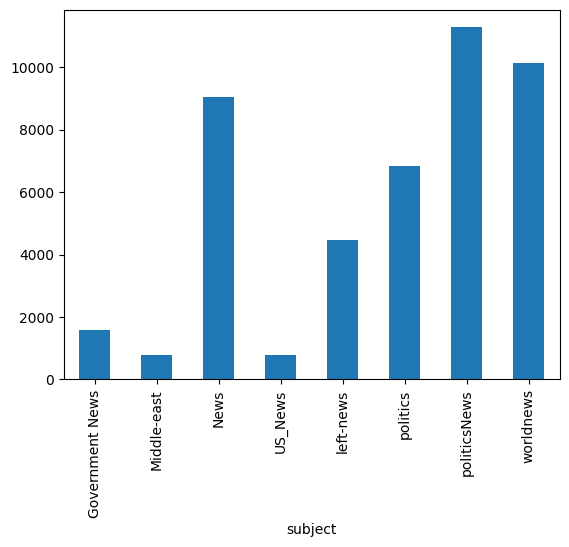

In [23]:
import matplotlib.pyplot as plt
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


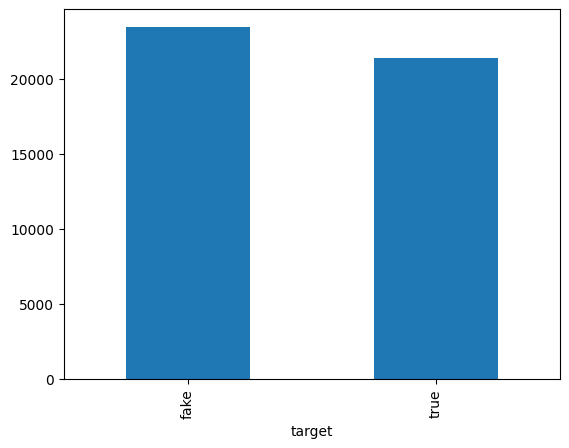

In [24]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

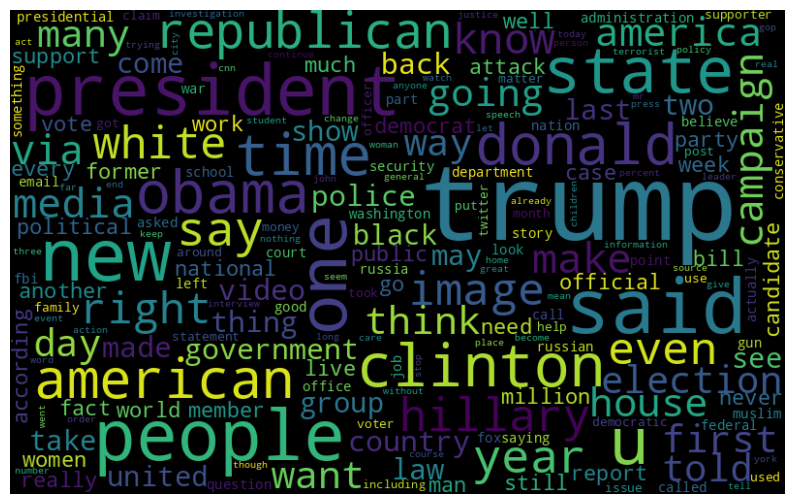

In [25]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

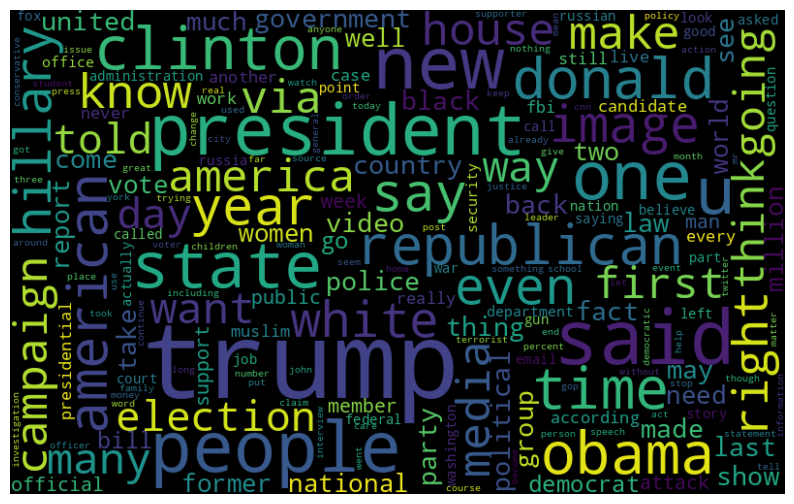

In [26]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

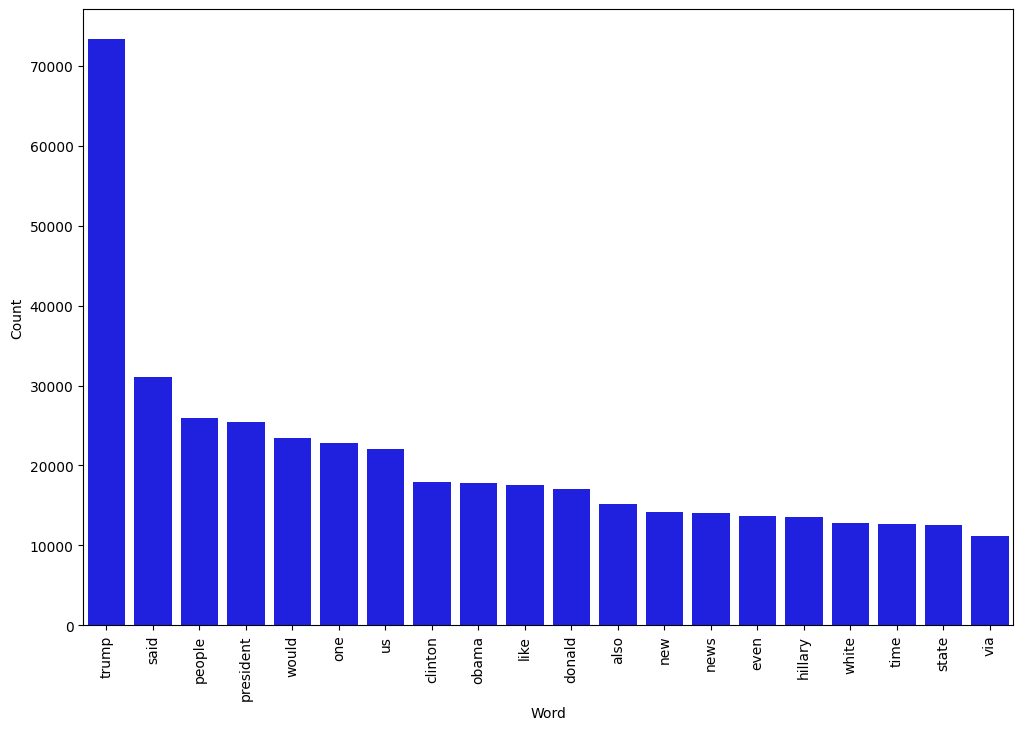

In [29]:
import seaborn as sns
counter(data[data["target"] == "fake"], "text", 20)

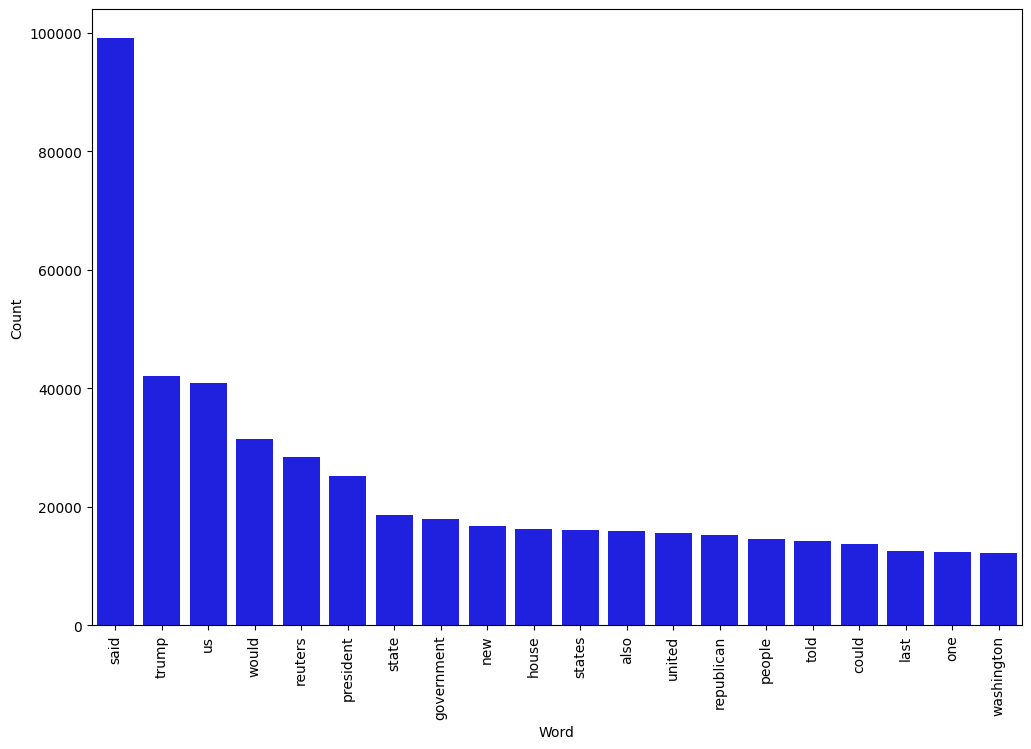

In [30]:
counter(data[data["target"] == "true"], "text", 20)

In [31]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
from sklearn.model_selection import train_test_split # Make sure this line is executed before calling the function

X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.88%


Confusion matrix, without normalization


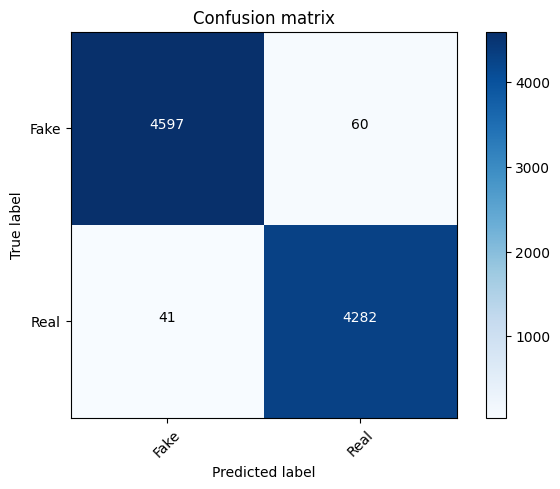

In [38]:
import numpy as np
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.61%


Confusion matrix, without normalization


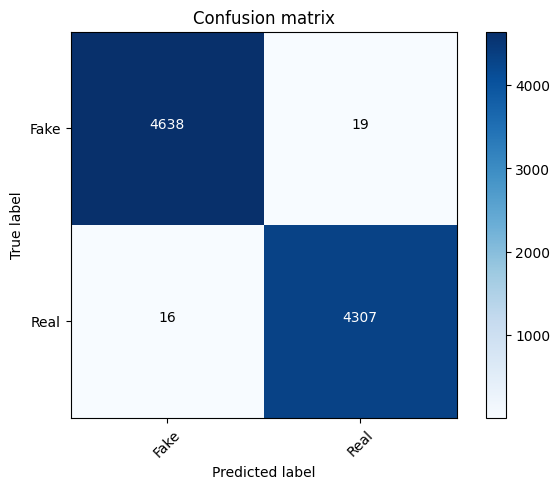

In [40]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [41]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.06%


Confusion matrix, without normalization


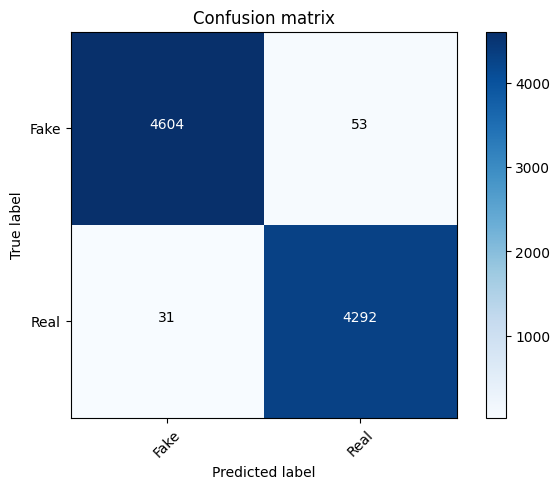

In [42]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])